In [2]:
import pandas as pd

# Load the CSV file
csv_file_path = "eeg_data_expanded.csv"
eeg_data = pd.read_csv(csv_file_path)

# Inspect the first few rows
print(eeg_data.head())


       id  schizo region                                           eeg_data
0  S164W1       0     F7  [9.48, 109.94, 308.96, 348.76, 269.15, 208.5, ...
1  S164W1       0     F3  [-151.64, 9.48, 259.68, 318.44, 348.76, 299.48...
2  S164W1       0     F4  [159.22, 339.29, 519.36, 458.7, 189.55, 58.76,...
3  S164W1       0     F8  [259.68, 318.44, 358.24, 259.68, 9.48, -130.79...
4  S164W1       0     T3  [238.83, 399.94, 519.36, 458.7, 149.74, -11.37...


In [5]:
import numpy as np

# Convert the `eeg_data` column to a NumPy array for processing
eeg_data["eeg_data"] = eeg_data["eeg_data"].apply(eval)                                     

In [6]:
# Combine all channels for the same subject into a DataFrame
subject_id = "S164W1"  # Replace with the desired subject ID
subject_data = eeg_data[eeg_data["id"] == subject_id]

# Create a DataFrame where each column is a channel and rows are time points
reshaped_data = pd.DataFrame(
    np.array(subject_data["eeg_data"].to_list()).T,
    columns=subject_data["region"]
)

# Add a time column (assuming 128 Hz sampling rate)
sampling_rate = 128
time_points = len(reshaped_data)
reshaped_data["Time (s)"] = np.arange(0, time_points / sampling_rate, 1 / sampling_rate)

print(reshaped_data.head())

region      F7      F3      F4      F8      T3      C3      Cz      C4     T4  \
0         9.48 -151.64  159.22  259.68  238.83 -470.07 -290.00 -151.64 -20.85   
1       109.94    9.48  339.29  318.44  399.94 -191.44  -20.85   79.61  39.80   
2       308.96  259.68  519.36  358.24  519.36  318.44  479.55  479.55  98.56   
3       348.76  318.44  458.70  259.68  458.70  418.90  519.36  498.51  79.61   
4       269.15  348.76  189.55    9.48  149.74  208.50  288.11  339.29  49.28   

region      T5      P3      Pz      P4      T6      O1      O2  Time (s)  
0       418.90 -271.05  -90.98 -170.59 -250.20 -331.70 -231.25  0.000000  
1       498.51  -30.33   58.76  -70.13 -310.85 -191.44 -151.64  0.007812  
2       489.03  128.89  119.41 -130.79 -401.84   18.95  -70.13  0.015625  
3       379.09   58.76  -20.85 -231.25 -430.27   79.61 -111.83  0.023438  
4        58.76 -261.57 -221.77 -271.05 -240.72    0.00 -191.44  0.031250  


In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


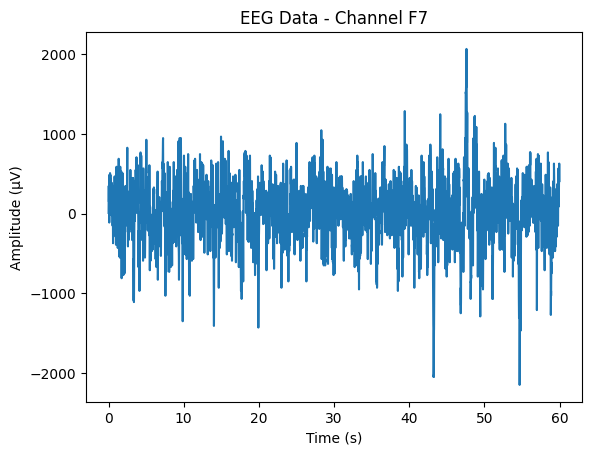

In [15]:
import matplotlib.pyplot as plt

# Plot a single channel
channel = "F7"  # Replace with the desired channel
plt.plot(reshaped_data["Time (s)"], reshaped_data[channel])
plt.title(f"EEG Data - Channel {channel}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (μV)")
plt.show()

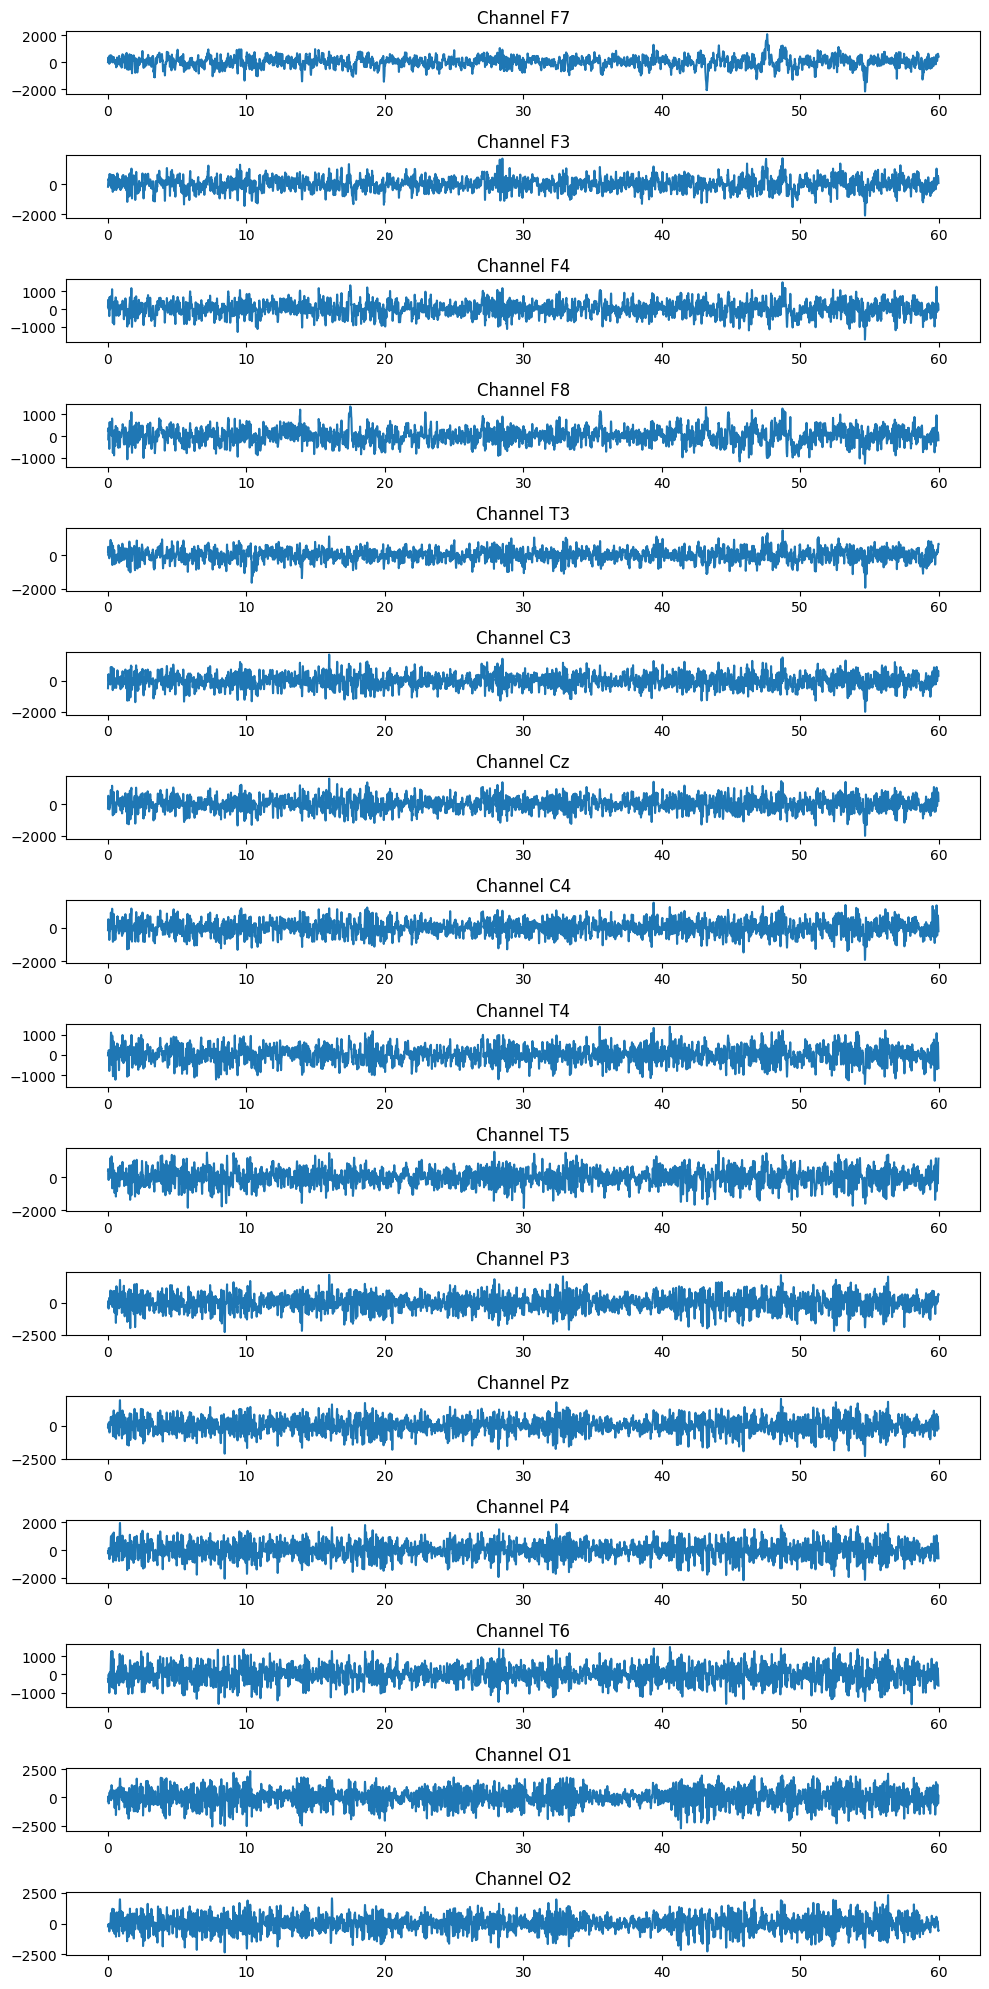

In [18]:
# Plot all channels
plt.figure(figsize=(10, 20))
for i, channel in enumerate(subject_data["region"]):
    plt.subplot(len(subject_data), 1, i + 1)
    plt.plot(reshaped_data["Time (s)"], reshaped_data[channel])
    plt.title(f"Channel {channel}")
    plt.tight_layout()
plt.show()

In [20]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 7.3 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


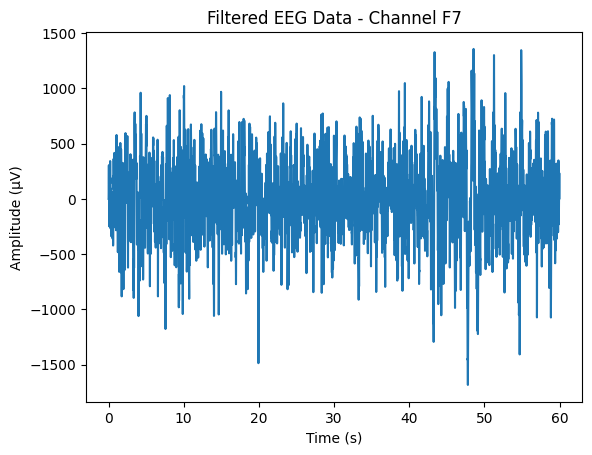

In [21]:
from scipy.signal import butter, lfilter

# Define a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return lfilter(b, a, data)

# Apply filter to a specific channel
filtered_data = bandpass_filter(reshaped_data["F7"], lowcut=0.5, highcut=30, fs=128)

# Plot the filtered data
plt.plot(reshaped_data["Time (s)"], filtered_data)
plt.title("Filtered EEG Data - Channel F7")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (μV)")
plt.show()